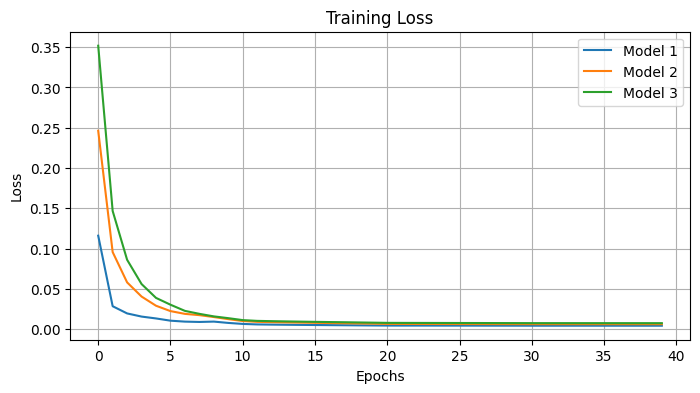

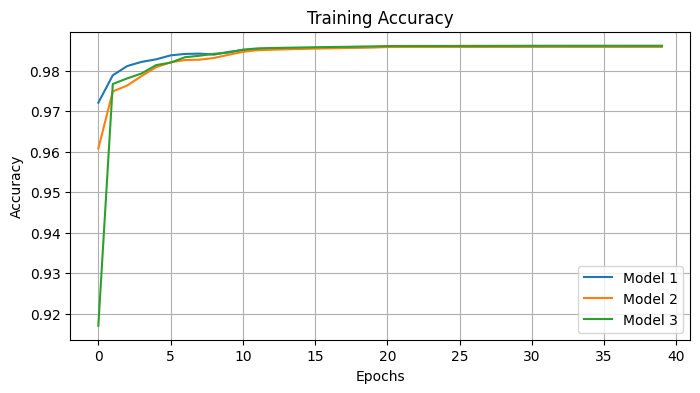

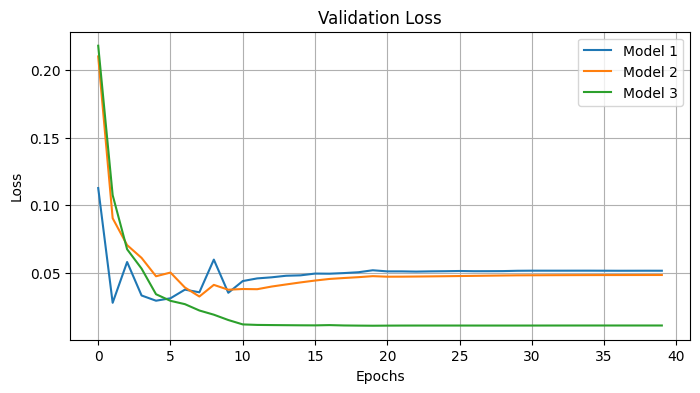

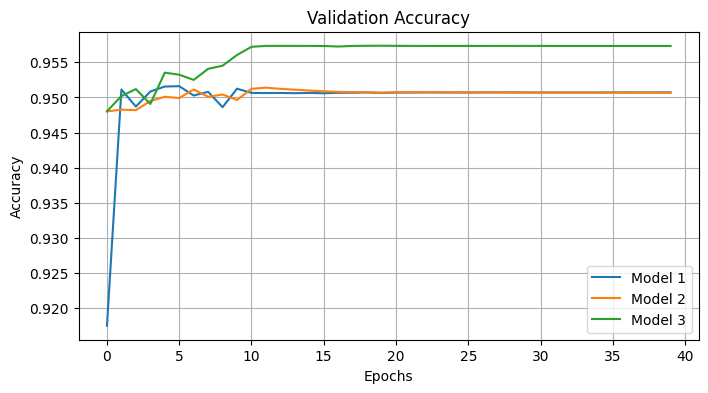

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Step 1: Load CSV files
csv_files = glob.glob("ckpt/plots/*.csv")

# Initialize lists to store data
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []

# Step 2: Read each CSV file
for file in csv_files:
    df = pd.read_csv(file)
    training_losses.append(df['train_loss'])
    training_accuracies.append(df['train_acc'])
    validation_losses.append(df['valid_loss'])
    validation_accuracies.append(df['valid_acc'])

# Step 3: Plot Training Loss
plt.figure(figsize=(8, 4))
for losses in training_losses:
    plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend([f'Model {i+1}' for i in range(len(training_losses))], loc='upper right')
plt.grid()
# plt.savefig('training_loss.png')
plt.show()

# Step 4: Plot Training Accuracy
plt.figure(figsize=(8, 4))
for acc in training_accuracies:
    plt.plot(acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend([f'Model {i+1}' for i in range(len(training_accuracies))], loc='lower right')
plt.grid()
# plt.savefig('training_accuracy.png')
plt.show()

# Step 5: Plot Validation Loss
plt.figure(figsize=(8, 4))
for losses in validation_losses:
    plt.plot(losses)
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend([f'Model {i+1}' for i in range(len(validation_losses))], loc='upper right')
plt.grid()
# plt.savefig('validation_loss.png')
plt.show()

# Step 6: Plot Validation Accuracy
plt.figure(figsize=(8, 4))
for acc in validation_accuracies:
    plt.plot(acc)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend([f'Model {i+1}' for i in range(len(validation_accuracies))], loc='lower right')
plt.grid()
# plt.savefig('validation_accuracy.png')
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [12]:
# Path to the folder containing the CSV files
folder_path = "ckpt/plots"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Dictionary to store data for each model
model_data = {}

for file in csv_files:
    model_name = os.path.splitext(file)[0].split("training_results_")[-1]
    file_path = os.path.join(folder_path, file)
    model_data[model_name] = pd.read_csv(file_path)


In [13]:
def plot_metric(metric, ylabel, model_data):
    plt.figure(figsize=(12, 8))
    for model_name, data in model_data.items():
        plt.plot(data['epoch'][:15], data[metric][:15], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} for Different Models')
    plt.legend()
    plt.grid()
    plt.show()


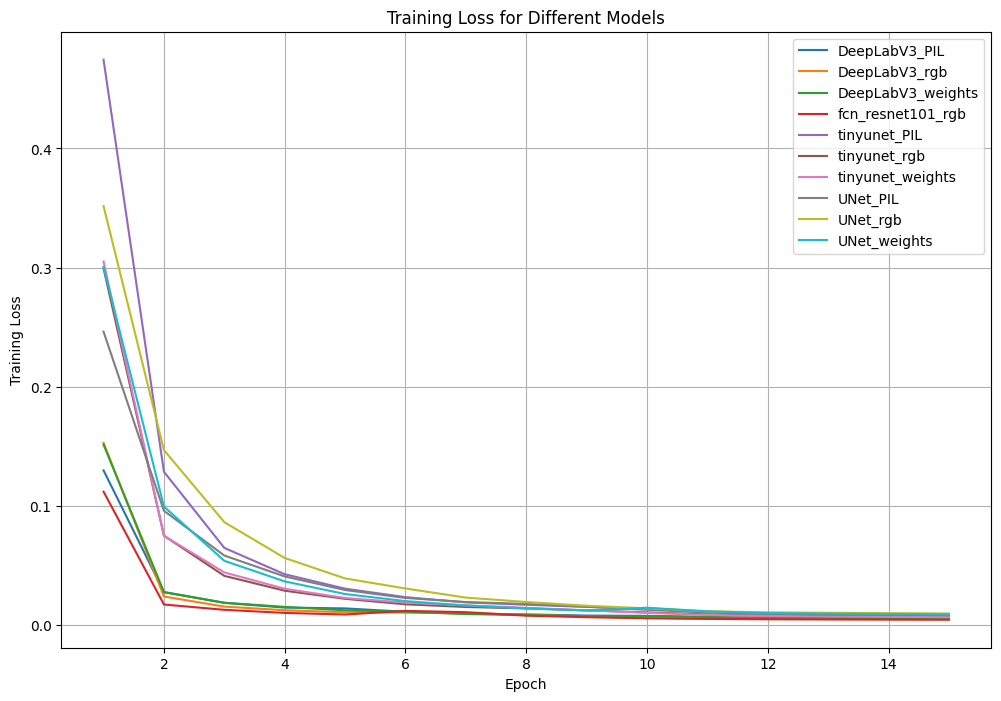

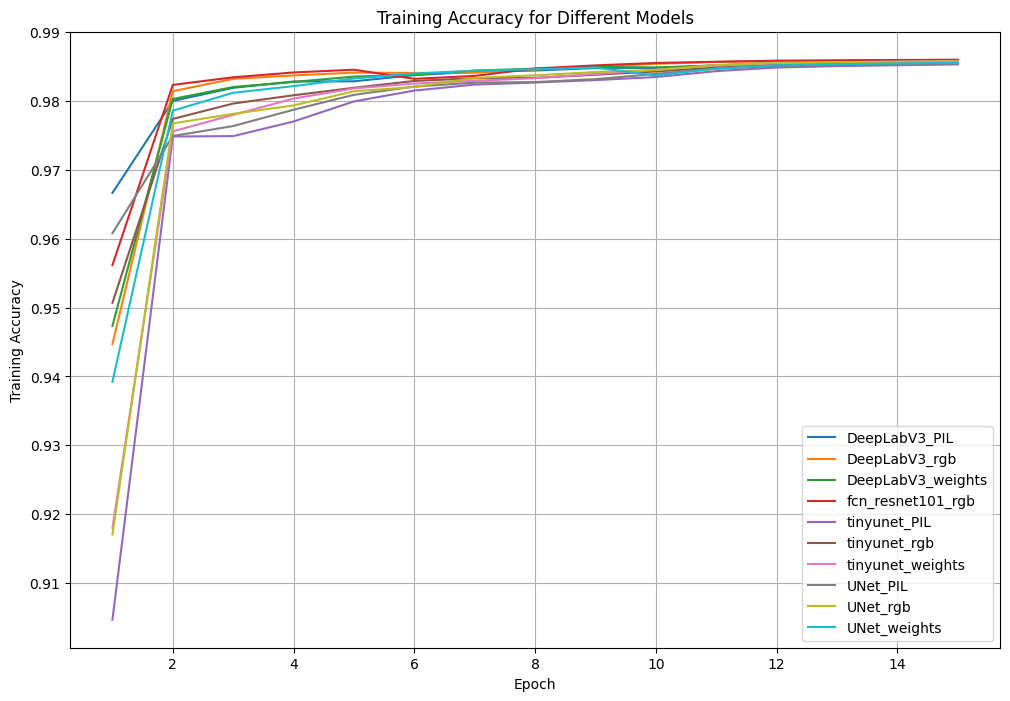

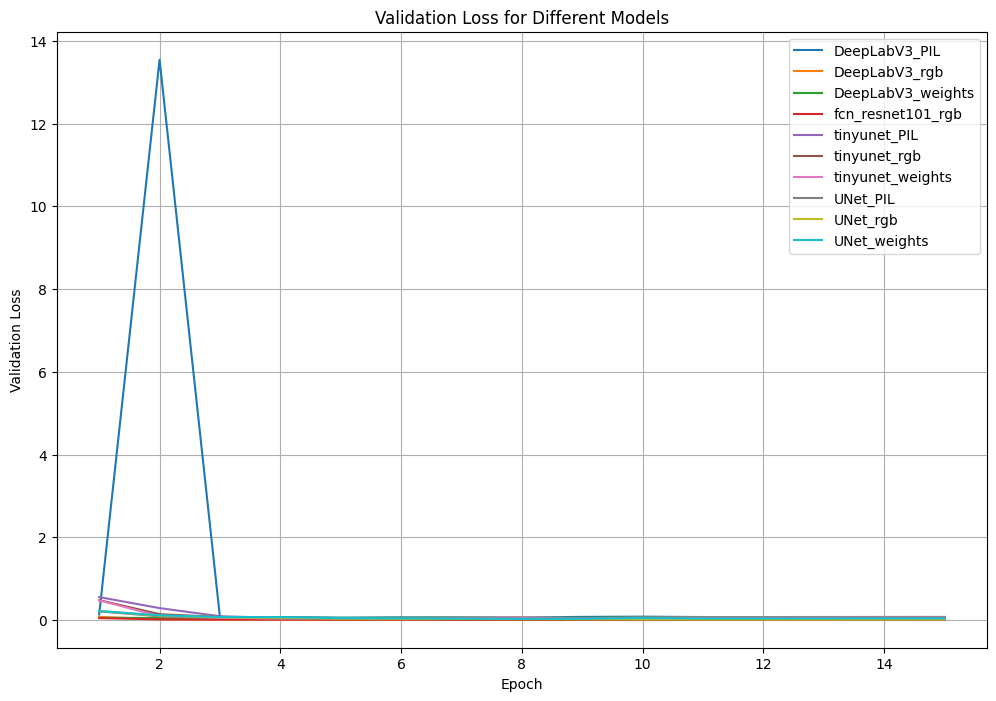

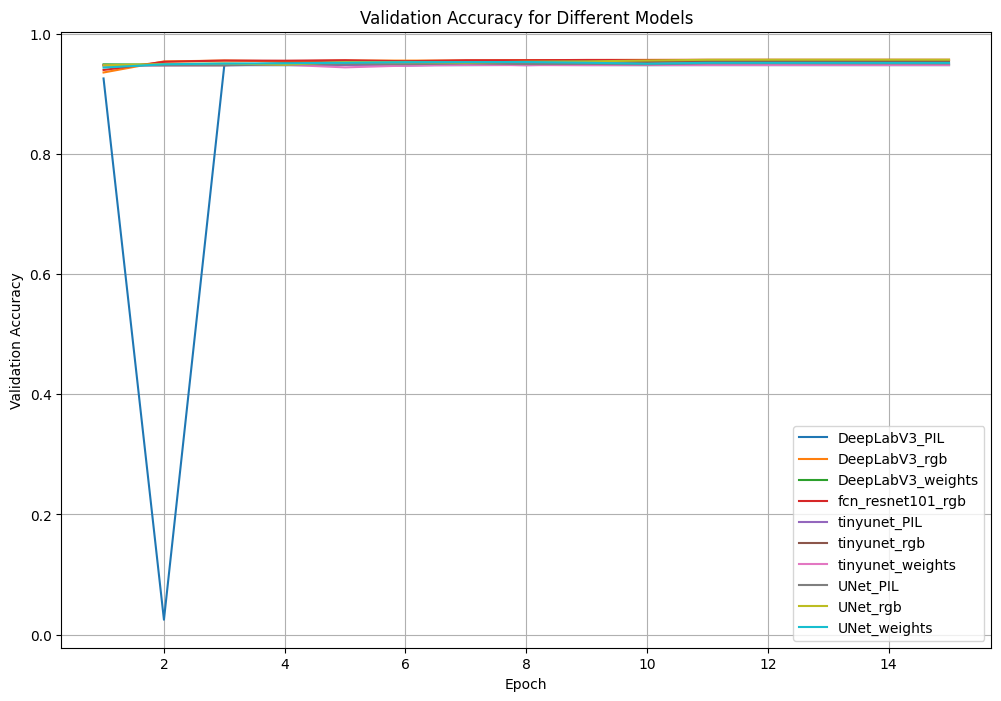

In [14]:
# Plot training loss
plot_metric('train_loss', 'Training Loss', model_data)

# Plot training accuracy
plot_metric('train_acc', 'Training Accuracy', model_data)

# Plot validation loss
plot_metric('valid_loss', 'Validation Loss', model_data)

# Plot validation accuracy
plot_metric('valid_acc', 'Validation Accuracy', model_data)


In [ ]:
def plot_metric(metric, ylabel, model_data, save_dir="plots"):
    os.makedirs(save_dir, exist_ok=True)
    plt.figure(figsize=(10, 6))
    for model_name, data in model_data.items():
        plt.plot(data['epoch'], data[metric], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} for Different Models')
    plt.legend()
    plt.grid()
    save_path = os.path.join(save_dir, f"{metric}.png")
    plt.savefig(save_path)
    print(f"Saved plot to {save_path}")
    plt.close()


In [ ]:
plot_metric('train_loss', 'Training Loss', model_data)
plot_metric('train_acc', 'Training Accuracy', model_data)
plot_metric('valid_loss', 'Validation Loss', model_data)
plot_metric('valid_acc', 'Validation Accuracy', model_data)
